Cohorts Analysis

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns


In [2]:
data = pd.read_csv("cohorts.csv")
print(data.head())

         Date  New users  Returning users  Duration Day 1  Duration Day 7
0  25/10/2023       3461             1437      202.156977      162.523809
1  26/10/2023       3777             1554      228.631944      258.147059
2  27/10/2023       3100             1288      227.185841      233.550000
3  28/10/2023       2293              978      261.079545      167.357143
4  29/10/2023       2678             1082      182.567568      304.350000


In [3]:
data.describe()

,New users,Returning users,Duration Day 1,Duration Day 7
count,30.000000,30.000000,30.000000,30.000000
mean,3418.166667,1352.866667,208.259594,136.037157
std,677.407486,246.793189,64.730830,96.624319
min,1929.000000,784.000000,59.047619,0.000000
25%,3069.000000,1131.500000,182.974287,68.488971
50%,3514.500000,1388.000000,206.356554,146.381667
75%,3829.500000,1543.750000,230.671046,220.021875
max,4790.000000,1766.000000,445.872340,304.350000


In [4]:
missing_value = data.isnull().sum()
print(missing_value)

Date               0
New users          0
Returning users    0
Duration Day 1     0
Duration Day 7     0
dtype: int64


In [5]:
data_type = data.dtypes
print(data_type)

Date                object
New users            int64
Returning users      int64
Duration Day 1     float64
Duration Day 7     float64
dtype: object


In [6]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

In [7]:
data_type = data.dtypes
print(data_type)

Date               datetime64[ns]
New users                   int64
Returning users             int64
Duration Day 1            float64
Duration Day 7            float64
dtype: object


In [8]:
data.head()

,Date,New users,Returning users,Duration Day 1,Duration Day 7
0,2023-10-25,3461,1437,202.156977,162.523809
1,2023-10-26,3777,1554,228.631944,258.147059
2,2023-10-27,3100,1288,227.185841,233.550000
3,2023-10-28,2293,978,261.079545,167.357143
4,2023-10-29,2678,1082,182.567568,304.350000


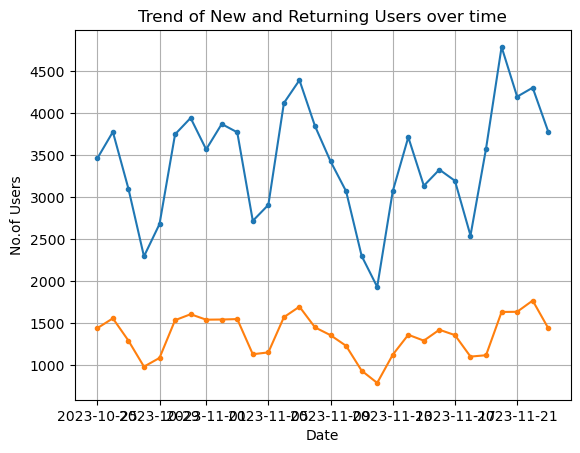

In [26]:
x1 = data['Date']
y1 = data['New users']

x2 = data['Date']
y2 = data['Returning users']

plt.xlabel("Date")
plt.ylabel("No.of Users")
plt.title("Trend of New and Returning Users over time")


plt.plot(x1,y1,x2,y2, marker = 'o', ms = 3)
plt.grid()
plt.show()

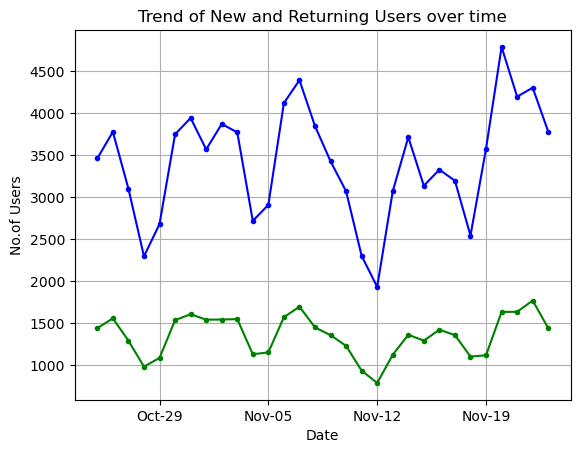

In [29]:
# DATE VS USERS, WEEKLY

x1 = data['Date']
y1 = data['New users']

x2 = data['Date']
y2 = data['Returning users']

plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday = 6))  # Set ticks on the first day of each month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))  # Format as year-month

plt.xlabel("Date")
plt.ylabel("No.of Users")
plt.title("Trend of New and Returning Users over time")

plt.plot(x1,y1, color='blue', marker = 'o', ms = 3)
plt.plot(x2,y2, color='green', marker = 'o', ms = 3)
plt.grid()
plt.show()

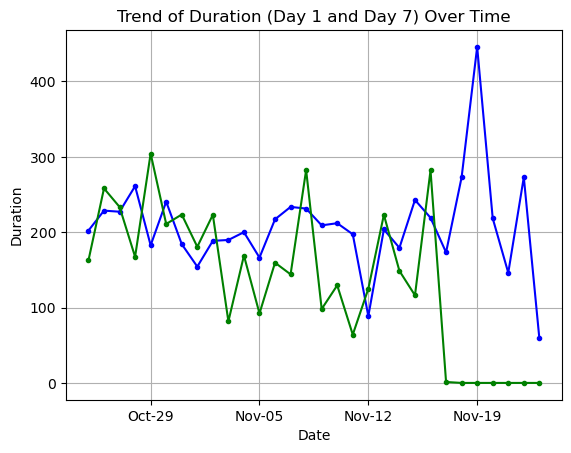

In [31]:
# DATE VS DURATION, WEEKLY

x1 = data['Date']
y1 = data['Duration Day 1']

x2 = data['Date']
y2 = data['Duration Day 7']

#plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday = 6))  # Set ticks on the first day of each month
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))  # Format as year-month

plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday = 6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))

plt.xlabel("Date")
plt.ylabel("Duration")
plt.title("Trend of Duration (Day 1 and Day 7) Over Time")

plt.plot(x1,y1, color = 'blue', marker = 'o', ms = 3)
plt.plot(x2,y2, color = 'green', marker = 'o', ms = 3)
plt.grid()
plt.show()

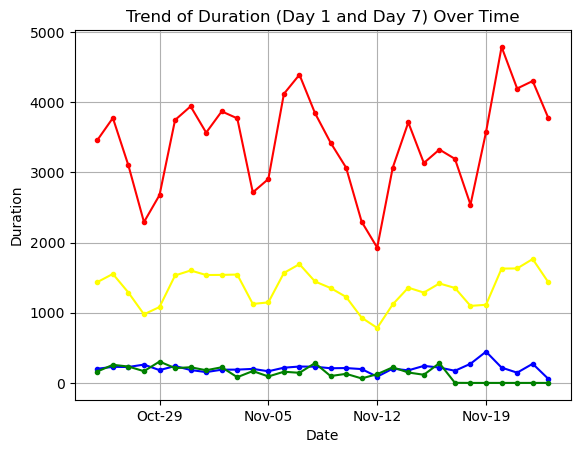

In [32]:
x1 = data['Date']
y1 = data['Duration Day 1']

x2 = data['Date']
y2 = data['Duration Day 7']

x3 = data['Date']
y3 = data['New users']

x4 = data['Date']
y4 = data['Returning users']

#plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday = 6))  # Set ticks on the first day of each month
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))  # Format as year-month

plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday = 6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))

plt.xlabel("Date")
plt.ylabel("Duration")
plt.title("Trend of Duration (Day 1 and Day 7) Over Time")

plt.plot(x1,y1, color = 'blue', marker = 'o', ms = 3)
plt.plot(x2,y2, color = 'green', marker = 'o', ms = 3)
plt.plot(x3,y3, color = 'red', marker = 'o', ms = 3)
plt.plot(x4,y4, color = 'yellow', marker = 'o', ms = 3)

plt.grid()
plt.show()

/var/folders/kk/l7qpv_zs0q1b1zqj_4frh_dh0000gn/T/ipykernel_7369/3428743296.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


Text(0.5, 1.0, 'Heatmap with Column Names')

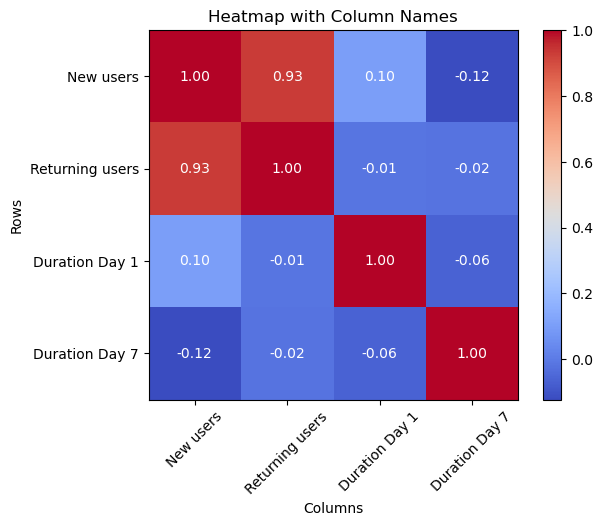

In [42]:
# CORRELATION B/W VARIABLES

correlation_matrix = data.corr()

heatmap = plt.imshow(correlation_matrix, cmap='coolwarm')

plt.colorbar(heatmap)

plt.xticks(ticks=np.arange(len(correlation_matrix.columns)), labels=correlation_matrix.columns, rotation=45)
plt.yticks(ticks=np.arange(len(correlation_matrix.columns)), labels=correlation_matrix.columns)

for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='white')


# Adding labels and title
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Heatmap with Column Names')



In [46]:
data['Week'] = data['Date'].dt.isocalendar().week

weekly_average = data.groupby('Week').agg({
    'New users':'mean',
    'Returning users':'mean',
    'Duration Day 1':'mean',
    'Duration Day 7':'mean'
}).reset_index()

weekly_average.head()

,Week,New users,Returning users,Duration Day 1,Duration Day 7
0,43,3061.800000,1267.800000,220.324375,225.185602
1,44,3503.571429,1433.142857,189.088881,168.723200
2,45,3297.571429,1285.714286,198.426524,143.246721
3,46,3222.428571,1250.000000,248.123542,110.199609
4,47,4267.750000,1616.250000,174.173330,0.000000


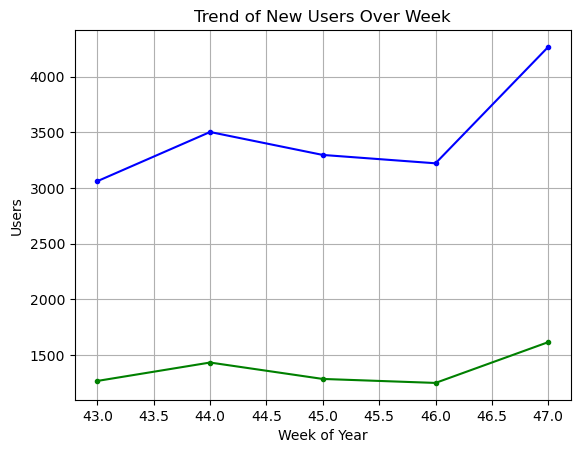

In [48]:
x1 = weekly_average['Week']
y1 = weekly_average['New users']

x2 = weekly_average['Week']
y2 = weekly_average['Returning users']


plt.xlabel("Week of Year")
plt.ylabel("Users")
plt.title("Trend of New Users Over Week")

plt.plot(x1,y1, color = 'blue', marker = 'o', ms = 3)
plt.plot(x2,y2, color = 'green', marker = 'o', ms = 3)
plt.grid()
plt.show()

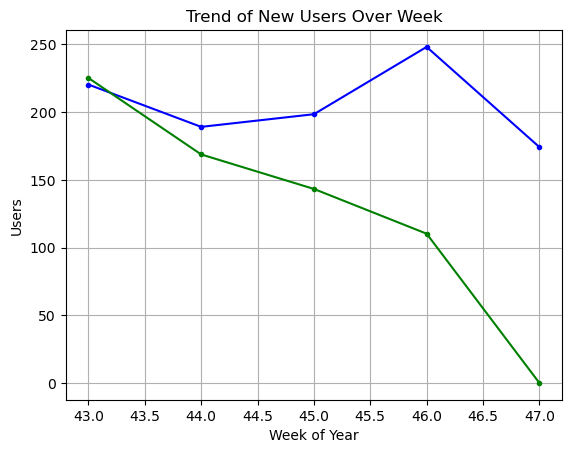

In [49]:
x1 = weekly_average['Week']
y1 = weekly_average['Duration Day 1']

x2 = weekly_average['Week']
y2 = weekly_average['Duration Day 7']


plt.xlabel("Week of Year")
plt.ylabel("Users")
plt.title("Trend of New Users Over Week")

plt.plot(x1,y1, color = 'blue', marker = 'o', ms = 3)
plt.plot(x2,y2, color = 'green', marker = 'o', ms = 3)
plt.grid()
plt.show()

Text(0.5, 1.0, 'Heatmap with Column Names')

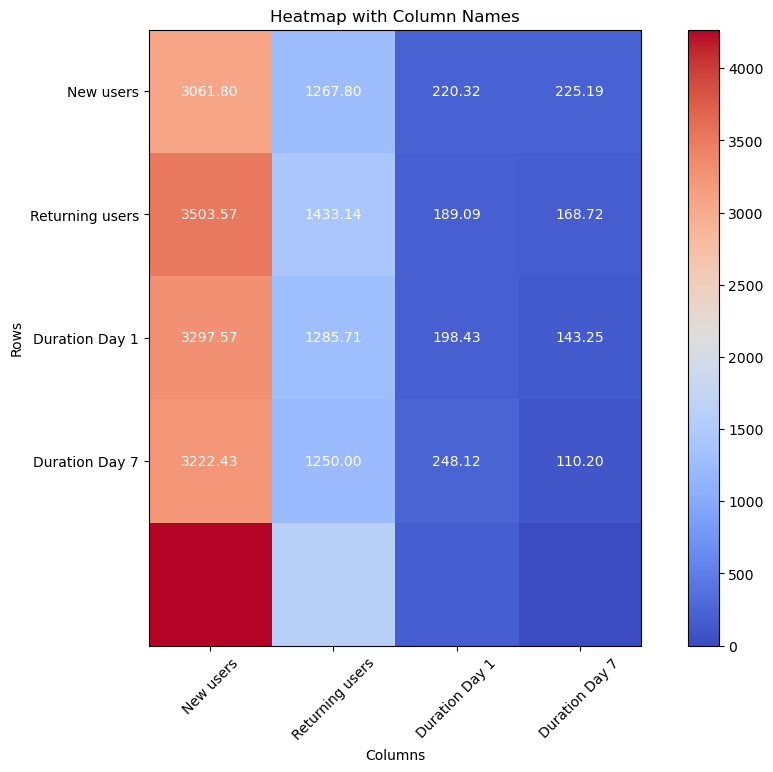

In [64]:
correlation_matrix = weekly_average.set_index('Week')
plt.figure(figsize=(12, 8))
heatmap = plt.imshow(correlation_matrix, cmap='coolwarm')

plt.colorbar(heatmap)

plt.xticks(ticks=np.arange(len(correlation_matrix.columns)), labels=correlation_matrix.columns, rotation=45)
plt.yticks(ticks=np.arange(len(correlation_matrix.columns)), labels=correlation_matrix.columns)

for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='white')


# Adding labels and title
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Heatmap with Column Names')

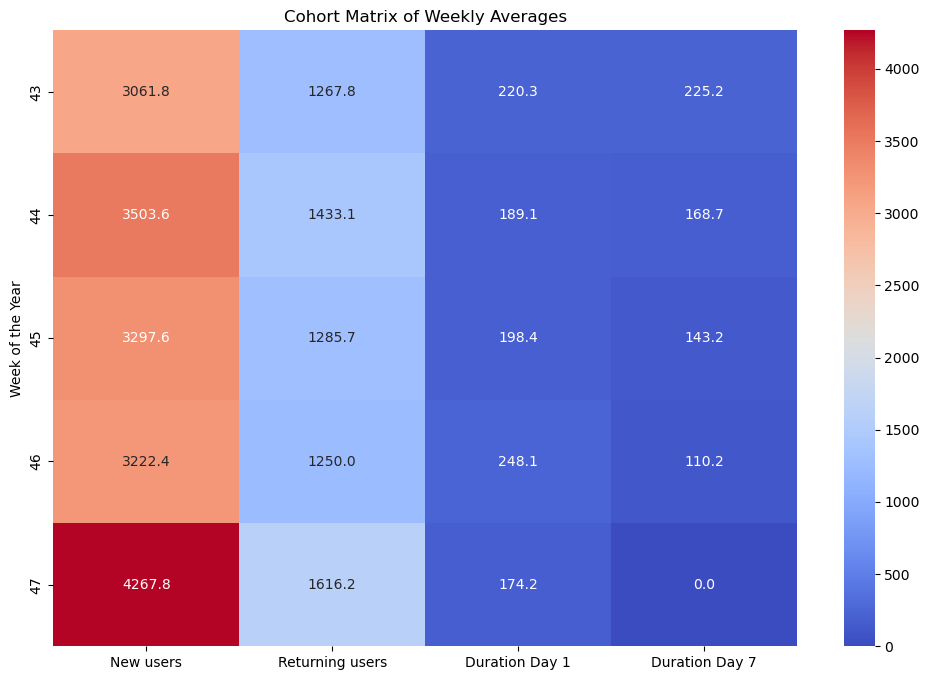

In [62]:
cohort_matrix = weekly_average.set_index('Week')

# Plotting the cohort matrix
plt.figure(figsize=(12, 8))

sns.heatmap(cohort_matrix, annot=True, cmap='coolwarm')
plt.title('Cohort Matrix of Weekly Averages')
plt.ylabel('Week of the Year')
plt.show()